/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
0.8428385416666665
Accuracy on training set: 0.826
Accuracy on test set: 0.766
TP - True Negative 107
FP - False Positive 16
FN - False Negative 29
TP - True Positive 40
Accuracy Rate: 0.765625
Misclassification Rate: 0.234375


0.72481

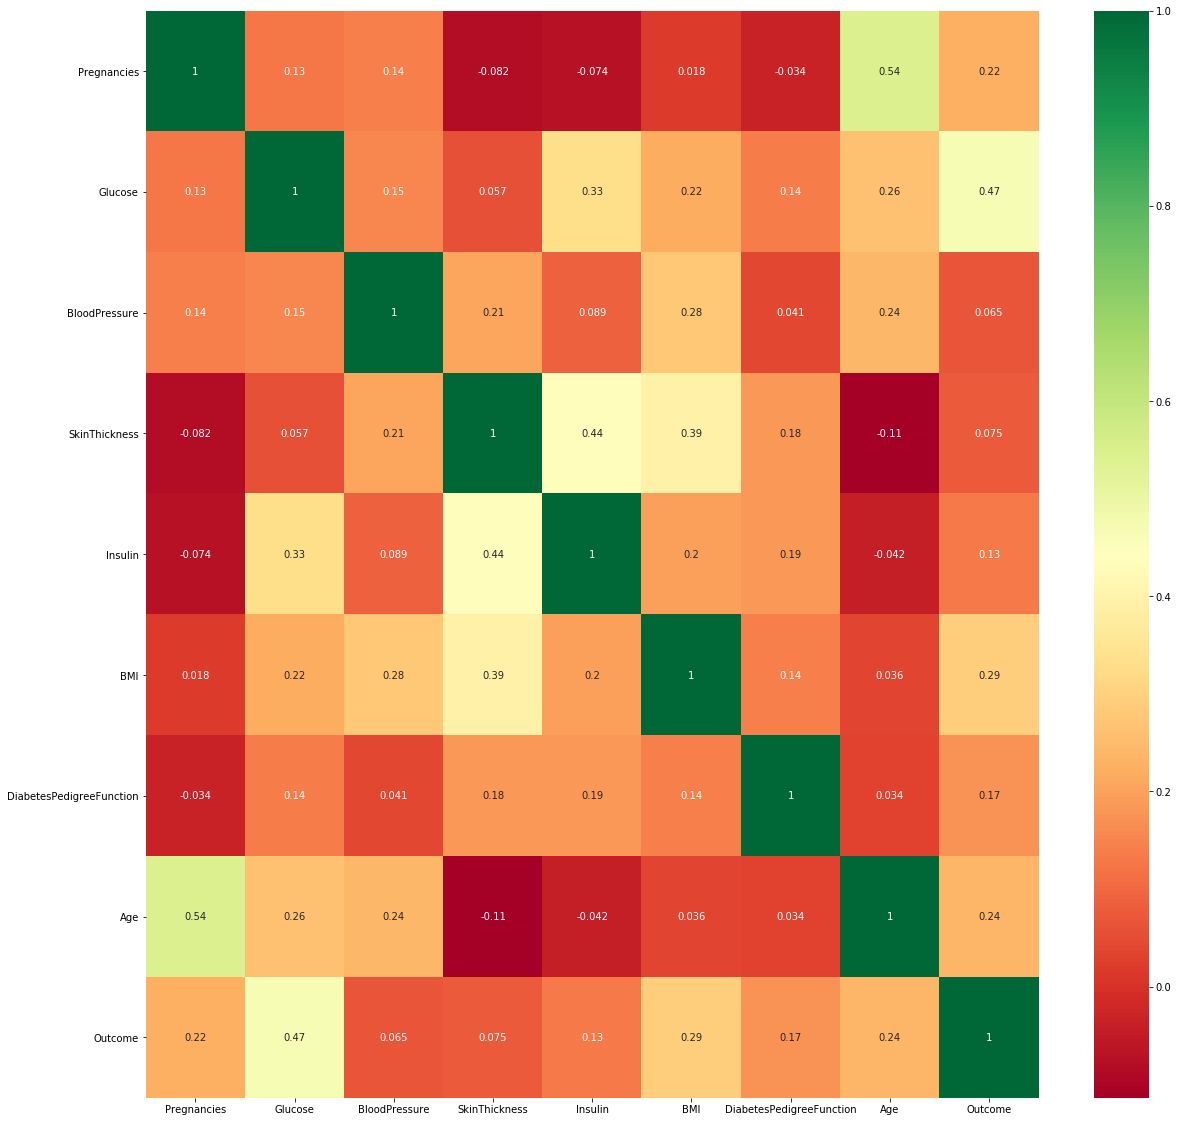

In [3]:
# ************* Random Forest Classfier ************* 

#              By - Chirag Khachane
#                   TECOA156

# ***************************************************


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Importing the dataset
dataset = pd.read_csv('/content/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Plotting the Heat map
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
rfclf = RandomForestClassifier(random_state=42)
parameters={'n_estimators': [50, 100],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7],
            'criterion' :['gini', 'entropy']
}
gridsearch=GridSearchCV(rfclf, parameters, cv=50, scoring='roc_auc', n_jobs = -1)
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)
rfclf.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=65, criterion = 'gini', max_depth = 4, 
                            max_features = 'auto', random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))


y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)


In [7]:
# ************* Decision Tree Classfier ************* 

#              By - Chirag Khachane
#                   TECOA156

# ***************************************************

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz


# Importing the dataset
dataset = pd.read_csv('/content/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
treeclf = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': [6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5],
              'max_features': [1, 2, 3, 4]
}
gridsearch=GridSearchCV(treeclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Adjusting development threshold
tree = DecisionTreeClassifier(max_depth =4, max_features = 4, 
                              min_samples_split = 5, 
                              random_state=61)
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Predicting the Test set results
y_pred = tree.predict(X_test) 

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)


{'max_depth': 6, 'max_features': 4, 'min_samples_split': 5}
0.781640625
Accuracy on training set: 0.797
Accuracy on test set: 0.760
TP - True Negative 107
FP - False Positive 16
FN - False Negative 30
TP - True Positive 39
Accuracy Rate: 0.7604166666666666
Misclassification Rate: 0.23958333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.71757

In [0]:
# ******************** KNN ************************* 

#              By - Supriya Shinde
#                   TECOA175

# ***************************************************



# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

# Importing the dataset
dataset = pd.read_csv('/content/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
knnclf = KNeighborsClassifier()
parameters={'n_neighbors': range(1, 20)}
gridsearch=GridSearchCV(knnclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Fitting K-NN to the Training set
knnClassifier = KNeighborsClassifier(n_neighbors = 18)
knnClassifier.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knnClassifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

# Predicting the Test set results
y_pred = knnClassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),9)

{'n_neighbors': 18}
0.8055338541666667
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.71
TP - True Negative 108
FP - False Positive 15
FN - False Negative 40
TP - True Positive 29
Accuracy Rate: 0.7135416666666666
Misclassification Rate: 0.2864583333333333


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.649169318

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5}
0.8388020833333334
Accuracy on training set: 0.882
Accuracy on test set: 0.750
TP - True Negative 96
FP - False Positive 27
FN - False Negative 21
TP - True Positive 48
Accuracy Rate: 0.75
Misclassification Rate: 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.81313

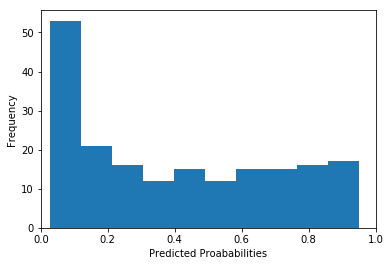

In [0]:
# ************* Gradient Boster Classifier ************* 

#              By - Kavita Kadadas
#                   TECOA147

# ***************************************************


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


# Importing the dataset
dataset = pd.read_csv('/content/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation with GSC validation
gbe = GradientBoostingClassifier(random_state=42)
parameters={'learning_rate': [0.05, 0.1, 0.5],
            'max_features': [0.5, 1],
            'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Adjusting development threshold
gbi = GradientBoostingClassifier(learning_rate=0.05, max_depth=3,
                                 max_features=0.5,
                                 random_state=42)
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state=42)
gbi.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbi.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbi.score(X_test, y_test)))

# Storing the prediction
y_pred = gbi.predict_proba(X_test)[:,1]

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))


# Plotting the predictions
plt.hist(y_pred,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

round(roc_auc_score(y_test,y_pred),5)

In [8]:
# ******************* SVM *************************** 

#              By - Kavita Kaddas
#                   TECOA147

# ***************************************************

# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Importing the dataset
dataset = pd.read_csv('/content/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#svm with grid search
svm = SVC(random_state = 42)
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),
              'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),
              'shrinking':(True,False)}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(), parameters, cv=5,
                       scoring='%s_macro' % score)
    svm.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(svm.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = svm.cv_results_['mean_test_score']
#     stds = svm.cv_results_['std_test_score']


#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, svm.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()

svm_model = SVC(kernel='rbf', C=100, gamma = 0.0001, random_state=42)
svm_model.fit(X_train, y_train)
spred = svm_model.predict(X_test)
print ('Accuracy with SVM {0}'.format(accuracy_score(spred, y_test) * 100))


# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

# Tuning hyper-parameters for recall

Accuracy with SVM 73.95833333333334
TP - True Negative 107
FP - False Positive 16
FN - False Negative 30
TP - True Positive 39
Accuracy Rate: 0.7604166666666666
Misclassification Rate: 0.23958333333333334


0.71757

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       123
           1       0.60      0.09      0.15        69

    accuracy                           0.65       192
   macro avg       0.63      0.53      0.47       192
weighted avg       0.63      0.65      0.55       192


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 0.25, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'shrinking': True}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192


Accuracy with SVM 73.95833333333334
TP - True Negative 97
FP - False Positive 26
FN - False Negative 25
TP - True Positive 44
Accuracy Rate: 0.734375
Misclassification Rate: 0.265625

0.71315